<a href="https://colab.research.google.com/github/AaditGoel/Stock_sentiment_analysis/blob/main/Stock_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def get_history(df,ticker):
  import yfinance as yf
  import requests
  import datetime
  import pandas as pd


  # Ticker = 'AAPL'
  E_date = df.iloc[0]['Date']
  # print(E_date)
  S_date = df.iloc[-1]['Date']
  # print(S_date)

  stock_data = yf.Ticker(ticker)
  hist = stock_data.history(start=S_date,end=E_date)
  hist = pd.DataFrame(hist)
  hist.columns = [col.lower() for col in hist.columns]

  return hist


In [ ]:
def get_data(ticker,date):
  import requests
  import pandas as pd
  from datetime import datetime
  API_KEY = '0QDiceo5dB9bg9Ttmhu2RAdCBHNKsADN'

  # DATE = datetime.strptime(date, '%Y-%m-%d')
  # END_DATE = datetime.strptime(date-relativedelta(year=1), '%Y-%m-%d')

  url = f'https://api.polygon.io/v2/reference/news?ticker={ticker}&published_utc.lte={date}&limit=1000&apiKey={API_KEY}'

  response = requests.get(url)
  # data = response.json()
  if response.status_code == 200:
      try:
          data = response.json()
      except ValueError as e:
          print(f"Error decoding JSON for {ticker} on {date}: {e}")
          print("Response content:", response.text)
          return None  # Return None to indicate failure
  else:
      print(f"API request failed for {ticker} on {date} with status code: {response.status_code}")
      return None


  news_data = {}

  for article in data['results']:
      date_uf = article['published_utc']
      date_obj = datetime.strptime(date_uf, '%Y-%m-%dT%H:%M:%SZ')
      date_only = date_obj.date()


      if date_only not in news_data:
              news_data[date_only] = []
              news_data[date_only].append({
              'title': article['title'],
          })


  news_data_list = [{'Date': date, 'articles': articles} for date, articles in news_data.items()]


  df = pd.DataFrame(news_data_list)
  hist = get_history(df,ticker)

  hist.index = pd.to_datetime(hist.index).tz_localize(None)
  hist = hist.reset_index()

  df = df.set_index('Date')
  hist = hist.set_index('Date')

  merged_df = df.join(hist, how='inner')
  merged_df = merged_df.reset_index()

  return merged_df

In [ ]:
def extract_title(row):
    if len(row['articles']) > 0:
        return row['articles'][0]['title']
    else:
        return None

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sent_tokenize
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores for each sentence and aggregate them
def get_aggregated_sentiment(text):
    sentences = sent_tokenize(text)
    compound_scores = [sid.polarity_scores(sentence)['compound'] for sentence in sentences]
    if compound_scores:
        return sum(compound_scores) / len(compound_scores)
    else:
        return 0

In [ ]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# from datetime import datetime
# import pandas as pd
# from dateutil.relativedelta import relativedelta
# tickers = ['GOOGL']
# date = '2024-06-16'

# # CURR_DATE.strftime('%Y-%m-%d')
# dfs1 = []
# for ticker in tickers:
#   i=0
#   while i<8:
#     df = get_data(ticker,date)
#     dfs1.append(df)

#     d = datetime.strptime(date, '%Y-%m-%d')  # Convert string to datetime object
#     d = d - relativedelta(months=4)
#     Date = datetime.strftime(d, '%Y-%m-%d')  # Format datetime object to string
#     date = Date
#     i+=1


# combined_df1 = pd.concat(dfs1, ignore_index=True)
# print(combined_df1)

In [ ]:
# tickers = ['MSFT']
# import pandas as pd
# date = '2022-11-19'

# # CURR_DATE.strftime('%Y-%m-%d')
# dfs2 = []
# for ticker in tickers:
#   i=0
#   while i<2:
#     df = get_data(ticker,date)
#     dfs2.append(df)

#     d = datetime.strptime(date, '%Y-%m-%d')  # Convert string to datetime object
#     d = d - relativedelta(months=4)
#     Date = datetime.strftime(d, '%Y-%m-%d')  # Format datetime object to string
#     date = Date
#     i+=1


# combined_df2 = pd.concat(dfs2, ignore_index=True)
# print(combined_df2)

In [ ]:
# tickers = ['AMZN']
# date = '2022-04-01'
# import pandas as pd
# # CURR_DATE.strftime('%Y-%m-%d')
# dfs3 = []
# for ticker in tickers:
#   i=0
#   while i<2:
#     df = get_data(ticker,date)
#     dfs3.append(df)

#     d = datetime.strptime(date, '%Y-%m-%d')  # Convert string to datetime object
#     d = d - relativedelta(months=4)
#     Date = datetime.strftime(d, '%Y-%m-%d')  # Format datetime object to string
#     date = Date
#     i+=1


# combined_df3 = pd.concat(dfs3, ignore_index=True)
# print(combined_df3)

In [ ]:
# import pandas as pd
# from datetime import datetime
# from dateutil.relativedelta import relativedelta
# tickers = ['AMZN']
# date = '2021-11-01'

# # CURR_DATE.strftime('%Y-%m-%d')
# dfs = []
# for ticker in tickers:
#   i=0
#   while i<2:
#     df = get_data(ticker,date)
#     dfs.append(df)

#     d = datetime.strptime(date, '%Y-%m-%d')  # Convert string to datetime object
#     d = d - relativedelta(months=4)
#     Date = datetime.strftime(d, '%Y-%m-%d')  # Format datetime object to string
#     date = Date
#     i+=1


# combined_df4 = pd.concat(dfs, ignore_index=True)
# print(combined_df4)

In [ ]:
# DF1 = [combined_df1,combined_df2,combined_df3,combined_df4]
# data1 = pd.concat(DF1,ignore_index=True)
# data1 = data1.sort_values('Date')
# data1 = data1.reset_index(drop=True)
# print(data1)

In [ ]:
# data1['price_change'] = data1['close'].diff()
# data1['label'] = (data1['price_change'] > 0).astype(int)
# data1['label'].iloc[0] = 0
# data1 = data1.drop(columns=['price_change'])

In [ ]:
# data1['news'] = data1.apply(extract_title, axis=1)
# data1 = data1.drop(columns=['articles'])

In [ ]:
# # FOR GENERATING TEST DATA
# test_data_df = combined_df2
# test_data_df['price_change'] = test_data_df['close'].diff()
# test_data_df['label'] = (test_data_df['price_change'] > 0).astype(int)
# test_data_df['label'].iloc[0] = 0
# test_data_df = test_data_df.drop(columns=['price_change'])
# test_data_df['news'] = test_data_df.apply(extract_title, axis=1)
# test_data_df = test_data_df.drop(columns=['articles'])

# excel_file_path = 'S:\Fin_club_ML_Project\Test_data.xlsx'

# # Create a Pandas Excel writer using XlsxWriter as the engine
# with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
#     # Write the DataFrame to the Excel sheet named 'Sheet1'
#     test_data_df.to_excel(writer, sheet_name='Sheet1', index=False)

# print(f"Data written to {excel_file_path}")

In [ ]:
# excel_file_path = 'S:\Fin_club_ML_Project\stock_data3.xlsx'

# # Create a Pandas Excel writer using XlsxWriter as the engine
# with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
#     # Write the DataFrame to the Excel sheet named 'Sheet1'
#     data1.to_excel(writer, sheet_name='Sheet1', index=False)

# print(f"Data written to {excel_file_path}")

In [ ]:
# data1['sentiment'] = data1['news'].apply(get_aggregated_sentiment)

In [ ]:
import re
def remove_pattern(text,pattern):
    r = re.findall(pattern,text)
    for i in r:
        text = re.sub(i,"",text)
    return text

In [ ]:
def replace_characters(input_string, chars_to_replace):
    pattern = f"[{''.join(re.escape(char) for char in chars_to_replace)}]"
    return re.sub(pattern, ' ', input_string)


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    processed_text = ' '.join(filtered_tokens)
    return processed_text

In [ ]:
import pandas as pd
import numpy as np
df1 = pd.read_excel(r'/stock_data.xlsx')
df2 = pd.read_excel(r'/stock_data2.xlsx')
df3 = pd.read_excel(r'/stock_data3.xlsx')

dfs = [df1,df2,df3]

chars_to_replace = ['@','?','-','--',';',':',',','"','—']
for df in dfs:
  df['news'] = df['news'].astype('string')
  df['news'] = np.vectorize(remove_pattern)(df['news'], "@*")
  df['news'] = df['news'].apply(lambda x: replace_characters(x, chars_to_replace))
  df['news'] = df['news'].apply(remove_stopwords)
  # df.head(10)
  print(df['news'].head())

0    Stock Market Power Rankings YouTube Catches So...
1                   Apple Makes Money iPhones Services
2                                  Facebook Make Money
3                          Much YouTube Worth Alphabet
4    Dow Plunges 500 Points September Slump Enters ...
Name: news, dtype: object
0    2 Top Ranked Cheap Stocks Buy Highs Strong Q1 ...
1                            Tech Sector Money Machine
2    Amazon Crushes Earnings 3x YOY Twitter Sags DA...
3           3 Stocks Buy May Economic Reopening Growth
4                Facebook Stock Jumped 10 % Last Month
Name: news, dtype: object
0                 Straight Answers Investing Questions
1    Amazon.com Reportedly Floating Massive $ 18.5 ...
2    Apple pushes back Epic claims defend app payme...
3    Big US chains offering perks lure back service...
4                Inverse ETFs Play Decline Tech Sector
Name: news, dtype: object


In [ ]:
#%%
for df in dfs:
    df['sentiment'] = df['news'].apply(get_aggregated_sentiment)
    df.drop(columns=['dividends','stock splits'])
    df['subjectivity'] = df['news'].apply(get_subjectivity)
    df['polarity'] = df['news'].apply(get_polarity)
    print(df.columns)
    print(df.shape)

Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits', 'label', 'news', 'sentiment', 'subjectivity',
       'polarity'],
      dtype='object')
(700, 13)
Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits', 'label', 'news', 'sentiment', 'subjectivity',
       'polarity'],
      dtype='object')
(442, 13)
Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits', 'label', 'news', 'sentiment', 'subjectivity',
       'polarity'],
      dtype='object')
(418, 13)


In [ ]:
#%%
# import pandas as pd
# test_data = pd.read_excel(r'S:\Fin_club_ML_Project\Test_data.xlsx')
# test_data['sentiment'] = test_data['news'].apply(get_aggregated_sentiment)
# test_data.drop(columns=['dividends','stock splits'])
# test_data['subjectivity'] = test_data['news'].apply(get_subjectivity)
# test_data['polarity'] = test_data['news'].apply(get_polarity)
# test_data.to_csv('updated_test_data.csv', index=False)

#%%
# import pandas as pd
# test_data = pd.read_csv(r'S:\Fin_club_ML_Project\updated_test_data.csv')
# keep = ['open','high','low','close','volume','label','sentiment','subjectivity','polarity']
# test_data = test_data[keep]
# excel_file_path = 'S:\Fin_club_ML_Project\Final_TEST_DATA.xlsx'

# # Create a Pandas Excel writer using XlsxWriter as the engine
# with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
#     # Write the DataFrame to the Excel sheet named 'Sheet1'
#     test_data.to_excel(writer, sheet_name='Sheet1', index=False)

# print(f"Data written to {excel_file_path}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
feature_cols = ['open','high','low','close','volume','sentiment','subjectivity','polarity']
test_cols = ['label']

svm_model = SVC(kernel='linear', random_state=42)
log_reg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [ ]:

test_df = pd.read_excel(r'/test .xlsx')

In [ ]:
test_df['sentiment'] = test_df['news'].apply(get_aggregated_sentiment)
test_df.drop(columns=['dividends','stock splits'])
test_df['subjectivity'] = test_df['news'].apply(get_subjectivity)
test_df['polarity'] = test_df['news'].apply(get_polarity)


In [ ]:
X_test = test_df[feature_cols]
Y_test = test_df[test_cols]


In [ ]:
for df in dfs:
  X = df[feature_cols]
  y = df[test_cols]
  log_reg_model.fit(X, y)
  rf_model.fit(X, y)
  xgb_model.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-28-447089d53bd5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-28-447089d53bd5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/util

In [ ]:
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(Y_test, xgb_predictions))
print("XGBoost Classification Report:\n", classification_report(Y_test, xgb_predictions))

XGBoost Accuracy: 0.5382775119617225
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.52      0.54       216
           1       0.52      0.56      0.54       202

    accuracy                           0.54       418
   macro avg       0.54      0.54      0.54       418
weighted avg       0.54      0.54      0.54       418



In [ ]:
xgb_predictions

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,

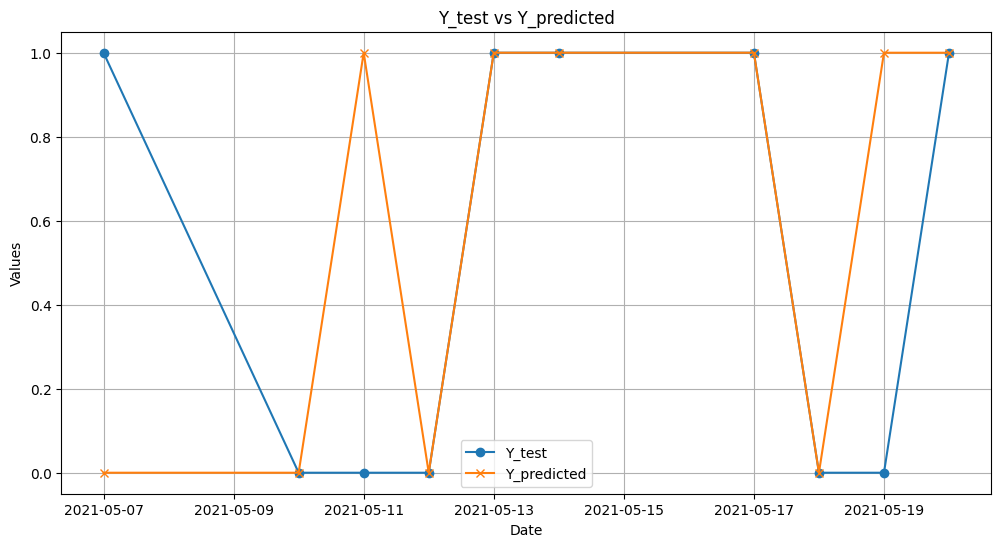

In [ ]:
xgb_predictions_df = pd.DataFrame(xgb_predictions, columns=['Y_predicted'])
# Concatenate the Y_test values as a column named 'Y_test'
Y_t = pd.DataFrame(Y_test.values, columns=['Y_test'])
df_plot = pd.concat([test_df.head(10), Y_t.head(10), xgb_predictions_df.head(10)], axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_plot['Date'], df_plot['Y_test'], label='Y_test', marker='o') # Now df_plot has the 'Y_test' column
plt.plot(df_plot['Date'], df_plot['Y_predicted'], label='Y_predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Y_test vs Y_predicted')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
log_reg_predictions = log_reg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, log_reg_predictions))
print("Logistic Regression Classification Report:\n", classification_report(Y_test, log_reg_predictions))

Logistic Regression Accuracy: 0.48325358851674644
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.48      1.00      0.65       202

    accuracy                           0.48       418
   macro avg       0.24      0.50      0.33       418
weighted avg       0.23      0.48      0.31       418



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


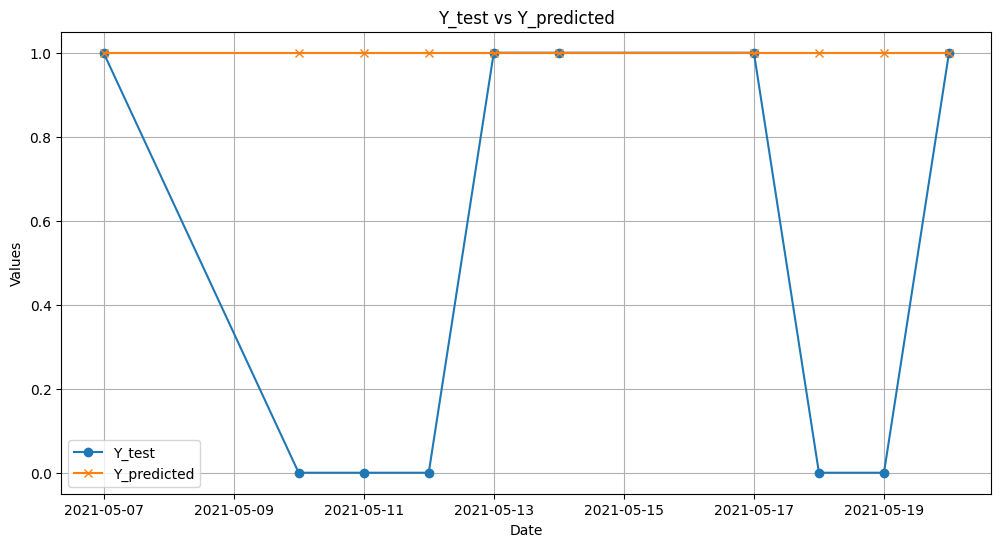

In [ ]:
log_reg_predictions_df = pd.DataFrame(log_reg_predictions, columns=['Y_predicted'])
# Concatenate the Y_test values as a column named 'Y_test'
Y_t = pd.DataFrame(Y_test.values, columns=['Y_test'])
df_plot = pd.concat([test_df.head(10), Y_t.head(10), log_reg_predictions_df.head(10)], axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_plot['Date'], df_plot['Y_test'], label='Y_test', marker='o') # Now df_plot has the 'Y_test' column
plt.plot(df_plot['Date'], df_plot['Y_predicted'], label='Y_predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Y_test vs Y_predicted')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(Y_test, rf_predictions))

Random Forest Accuracy: 0.5502392344497608
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55       216
           1       0.53      0.57      0.55       202

    accuracy                           0.55       418
   macro avg       0.55      0.55      0.55       418
weighted avg       0.55      0.55      0.55       418



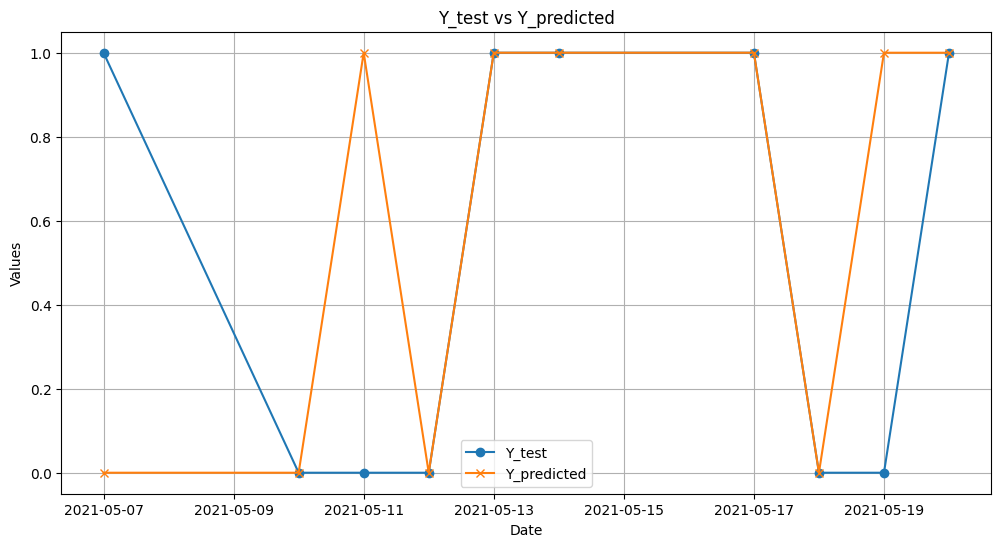

In [ ]:
rf_predictions_df = pd.DataFrame(rf_predictions, columns=['Y_predicted'])
# Concatenate the Y_test values as a column named 'Y_test'
Y_t = pd.DataFrame(Y_test.values, columns=['Y_test'])
df_plot = pd.concat([test_df.head(10), Y_t.head(10), rf_predictions_df.head(10)], axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_plot['Date'], df_plot['Y_test'], label='Y_test', marker='o') # Now df_plot has the 'Y_test' column
plt.plot(df_plot['Date'], df_plot['Y_predicted'], label='Y_predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Y_test vs Y_predicted')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
time_steps=1


In [ ]:
# Function to preprocess the data
def preprocess_data(df, time_step=10):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    features = df[['open', 'high', 'close', 'sentiment', 'polarity', 'subjectivity']]
    labels = df['label']
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(features)
    X, y = create_sequences(scaled_features, labels, time_step)
    y = to_categorical(y)
    return X, y, scaler

# Function to create sequences
def create_sequences(data, labels, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(labels[i + time_step])
    return np.array(X), np.array(y)

# Function to build the LSTM model
def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    learning_rate = 0.000000001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # model = Sequential()
    # model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units=50, return_sequences=False))
    # model.add(Dropout(0.2))
    # model.add(Dense(units=1, activation='sigmoid'))
    # # Compile the model with the chosen optimizer and learning rate
    # learning_rate = 0.001
    # optimizer = Adam(learning_rate=learning_rate)
    # model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# List of DataFrames
# dfs = [df1, df2, df3]

model = None

for i, df in enumerate(dfs):
    print(f"Training on DataFrame {i+1}...")
    X, y, scaler = preprocess_data(df)
    if model is None:
        model = build_lstm_model((X.shape[1], X.shape[2]), y.shape[1])
    else:
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X, y, batch_size=64, epochs=10, validation_split=0.1)




Training on DataFrame 1...
Epoch 1/10
10/10 [==============================] - 6s 167ms/step - loss: 0.6933 - accuracy: 0.4638 - val_loss: 0.6930 - val_accuracy: 0.6522
Epoch 2/10
10/10 [==============================] - 0s 21ms/step - loss: 0.6931 - accuracy: 0.5201 - val_loss: 0.6944 - val_accuracy: 0.3478
Epoch 3/10
10/10 [==============================] - 0s 22ms/step - loss: 0.6928 - accuracy: 0.5266 - val_loss: 0.6956 - val_accuracy: 0.3478
Epoch 4/10
10/10 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.5266 - val_loss: 0.6968 - val_accuracy: 0.3478
Epoch 5/10
10/10 [==============================] - 0s 19ms/step - loss: 0.6925 - accuracy: 0.5266 - val_loss: 0.6978 - val_accuracy: 0.3478
Epoch 6/10
10/10 [==============================] - 0s 19ms/step - loss: 0.6924 - accuracy: 0.5266 - val_loss: 0.6987 - val_accuracy: 0.3478
Epoch 7/10
10/10 [==============================] - 0s 21ms/step - loss: 0.6924 - accuracy: 0.5266 - val_loss: 0.6997 - val_ac

In [ ]:
# Preprocess the test DataFrame
# test_df['Date'] = pd.to_datetime(test_df['Date'])
# test_df.set_index('Date', inplace=True)
test_features = test_df[['open', 'high', 'close', 'sentiment', 'polarity', 'subjectivity']]
test_labels = test_df['label']
scaled_test_features = scaler.transform(test_features)
test_X, test_y = create_sequences(scaled_test_features, test_labels, time_step=10)
test_y = to_categorical(test_y)


test_loss, test_accuracy = model.evaluate(test_X, test_y)
print(f'Test Accuracy: {test_accuracy:.4f}')



test_predict = model.predict(test_X)
test_y_pred_classes = np.argmax(test_predict, axis=1)
test_y_true = np.argmax(test_y, axis=1)


print(classification_report(test_y_true, test_y_pred_classes))
print(confusion_matrix(test_y_true, test_y_pred_classes))

13/13 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.4828
Test Accuracy: 0.4828
13/13 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.48      1.00      0.65       197

    accuracy                           0.48       408
   macro avg       0.24      0.50      0.33       408
weighted avg       0.23      0.48      0.31       408

[[  0 211]
 [  0 197]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
